In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Housing.csv")   # apna file name yaha daal
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
X = df.drop("price", axis=1)
y = df["price"]


In [4]:
categorical_cols = [
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning"
]

numerical_cols = [
    "area", "bedrooms", "bathrooms", "stories"
]


In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)


In [6]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model.fit(X_train, y_train)
print("✅ Model Training Complete")


✅ Model Training Complete


In [9]:
y_pred = model.predict(X_test)


In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Model Performance:")
print("MAE  =", mae)
print("RMSE =", rmse)
print("R2 Score =", r2)


 Model Performance:
MAE  = 1029305.7135858353
RMSE = 1413204.618503101
R2 Score = 0.6048828690833159


In [11]:
new_house = pd.DataFrame({
    "mainroad": ["yes"],
    "guestroom": ["no"],
    "basement": ["yes"],
    "hotwaterheating": ["no"],
    "airconditioning": ["yes"],
    "area": [7500],
    "bedrooms": [3],
    "bathrooms": [2],
    "stories": [2]
})

predicted_price = model.predict(new_house)
print("🏠 Predicted House Price =", predicted_price[0])


🏠 Predicted House Price = 7233191.622992367


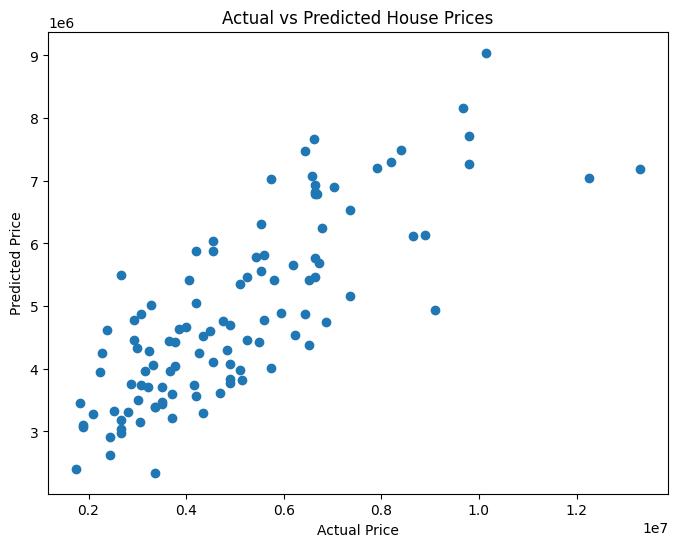

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")

plt.show()


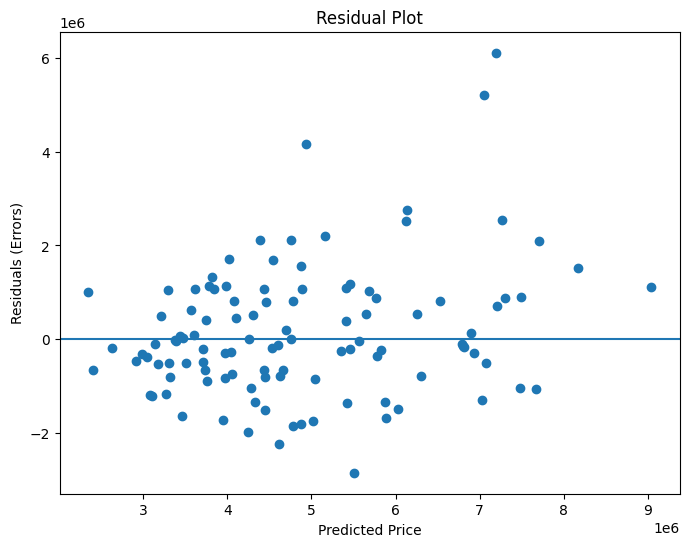

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)

plt.axhline(0)   # zero error line
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")

plt.show()


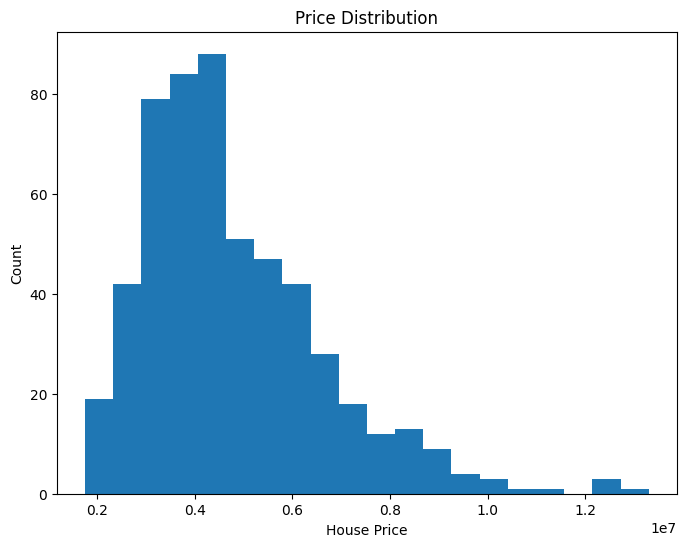

In [14]:
plt.figure(figsize=(8,6))
plt.hist(df["price"], bins=20)

plt.xlabel("House Price")
plt.ylabel("Count")
plt.title("Price Distribution")

plt.show()


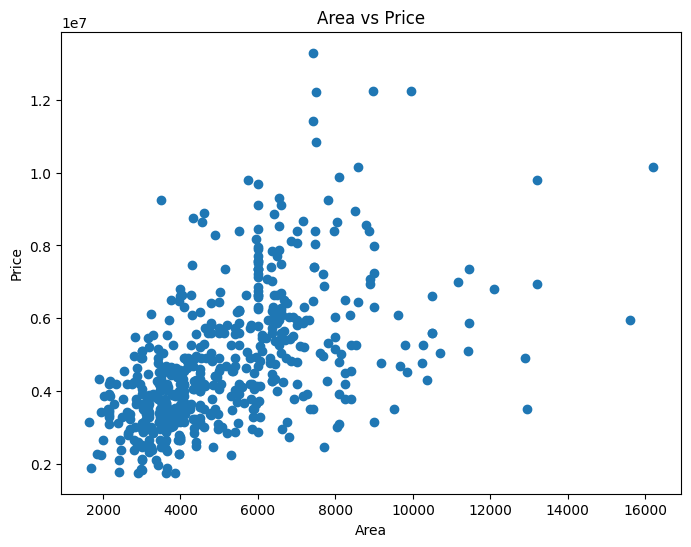

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df["area"], df["price"])

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")

plt.show()
